# ÂàÜÊûê

In [1]:
# 1. „É©„Ç§„Éñ„É©„É™„ÅÆ„Ç§„É≥„Éù„Éº„Éà
# vscode„ÅßÂÆüË°å„Åô„ÇãÂ†¥Âêà„Å´„ÅØipykernel„Éë„ÉÉ„Ç±„Éº„Ç∏„ÅåÂøÖË¶Å

import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

In [2]:
# 2. „Ç∞„É©„Éï„ÅÆË®≠ÂÆö

plt.style.use('fast') # „Çπ„Çø„Ç§„É´„ÅÆË®≠ÂÆö
plt.rcParams['figure.figsize'] = [9, 5] # „Çµ„Ç§„Ç∫„ÅÆË®≠ÂÆö

In [3]:
# 3. DataFrame„ÅÆ‰ΩúÊàê

file_path = "../data/BloodDonation.csv"
df = pd.read_csv(file_path)

# dateÂàó„Çí‰ΩúÊàê
df['date'] = pd.to_datetime((df['year'].astype(str)) + '-' + (df['month'].astype(str)))

### Â§âÂãïÊàêÂàÜ„ÅÆÂàÜËß£

**ÂÇæÂêëÂ§âÂãïÔºàTrendÔºâÔºö**<br>
„Éá„Éº„Çø„ÅÆÈï∑ÊúüÁöÑ„Å™ÂÇæÂêë„ÇÑ‰∏ÄÂÆö„ÅÆÊñπÂêëÊÄß„ÅßÂ∞ë„Åó„Å•„Å§Â§âÂåñ„Åô„ÇãÂãï„Åç„ÅÆ„Åì„Å®„ÄÇ<br>

**Âæ™Áí∞Â§âÂãïÔºàCycleÔºâÔºö**<br>
ÂÇæÂêëÂ§âÂãï„Çà„ÇäÁü≠ÊúüÁöÑ„ÅßÂë®ÊúüÁöÑ„Å´Áπ∞„ÇäËøî„Åï„Çå„ÇãÂãï„Åç„ÅÆ„Åì„Å®„ÄÇ<br>

**Â≠£ÁØÄÂ§âÂãïÔºàSeasonalÔºâÔºö**<br>
„Éá„Éº„Çø„ÅÆÂë®ÊúüÁöÑ„Å™Â§âÂãï„ÅÆ„Åì„Å®„ÄÇÈÄöÂ∏∏1Âπ¥„ÇíÂë®Êúü„Å®„Åô„Çã„ÄÇ<br>

**‰∏çË¶èÂâáÂ§âÂãïÔºàIrregularÔºâÔºö**<br>
„Éà„É¨„É≥„Éâ„ÄÅÂ≠£ÁØÄÂ§âÂãï„ÄÅÂæ™Áí∞Â§âÂãï„Åß„ÅØË™¨Êòé„Åß„Åç„Å™„ÅÑÁü≠ÊúüÁöÑ„Åã„Å§‰∏çË¶èÂâá„Å™Âãï„Åç„ÅÆ„Åì„Å®„ÄÇÊÆãÂ∑Æ„ÄÅ„Éé„Ç§„Ç∫„Å®„ÇÇÂëº„Å∞„Çå„Çã„ÄÇ

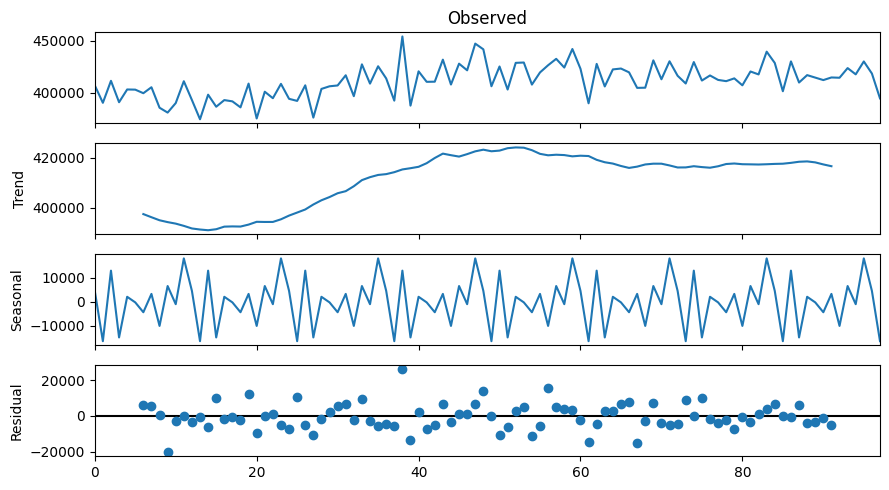

In [4]:
# date„Åî„Å®„ÅÆÂÖ®ÂõΩ„ÅÆblood_donors„Åß„Ç∞„É´„Éº„ÉóÂåñ
grouped_date_total = df.groupby(['date'])['blood_donors'].sum().to_frame()

# „Éà„É¨„É≥„Éâ„ÄÅÂ≠£ÁØÄÊÄß„ÄÅÊÆãÂ∑Æ„ÇíÊ±Ç„ÇÅ„ÇãÔºàÂä†Ê≥ï„É¢„Éá„É´Ôºâ
res_additive = sm.tsa.seasonal_decompose(grouped_date_total.values, period=12, model='additive')

# „Ç∞„É©„ÉïÂåñ
fig = res_additive.plot()
plt.show()

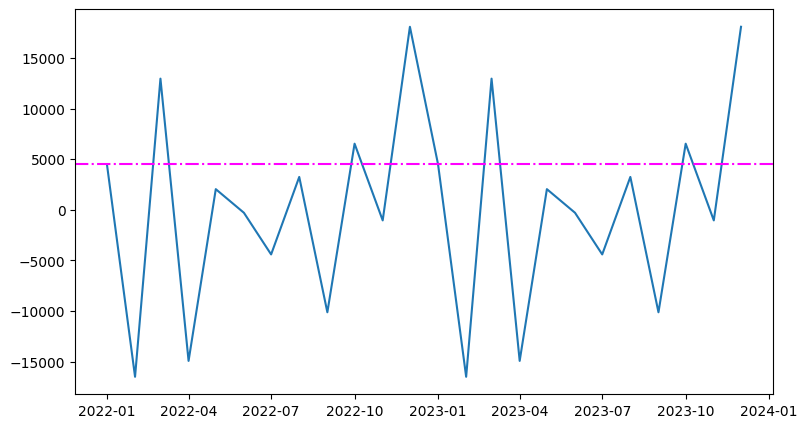

In [5]:
s = res_additive.seasonal[60]

additive_seasona = res_additive.seasonal[60:84]

# „Éà„É¨„É≥„Éâ„ÄÅÂ≠£ÁØÄÊÄß„ÄÅÊÆãÂ∑Æ„ÇíÊ±Ç„ÇÅ„ÇãÔºàÂä†Ê≥ï„É¢„Éá„É´Ôºâ
plt.plot(grouped_date_total.index[60:84], additive_seasona)
plt.axhline(s, ls = "-.", color = "magenta")
plt.show()

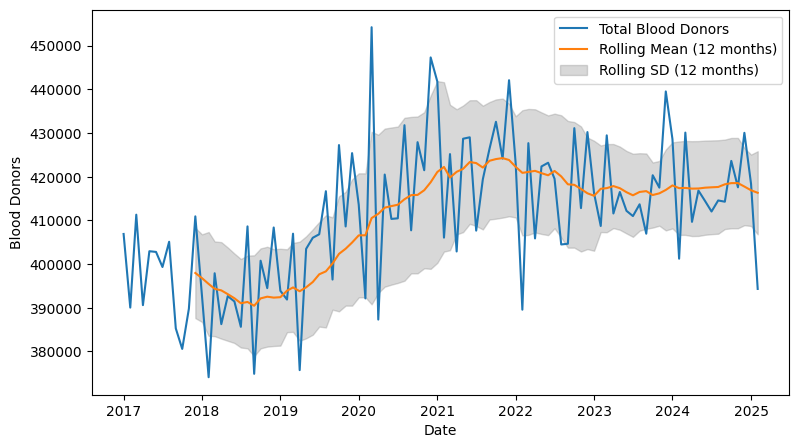

In [6]:
df_s = df.groupby(['date'])["blood_donors"].sum()

rolling_mean = df_s.rolling(window=12).mean()  # 12„É∂Êúà„ÅÆÁßªÂãïÂπ≥Âùá
rolling_sd = df_s.rolling(window=12).std()     # 12„É∂Êúà„ÅÆÁßªÂãïÊ®ôÊ∫ñÂÅèÂ∑Æ

plt.plot(df_s, label='Total Blood Donors')
plt.plot(rolling_mean, label='Rolling Mean (12 months)')
plt.fill_between(df_s.index, rolling_mean - rolling_sd, rolling_mean + rolling_sd, color='gray', alpha=0.3, label='Rolling SD (12 months)')

plt.xlabel('Date')
plt.ylabel('Blood Donors')
plt.legend()
plt.show()

Âä†Ê≥ï„É¢„Éá„É´Ôºö<br>
`statsmodels`„É©„Ç§„Éñ„É©„É™„ÅÆ`seasonal_decompose`Èñ¢Êï∞„Çí‰ΩøÁî®„Åó„ÅüÂä†Ê≥ï„É¢„Éá„É´„ÅØ„ÄÅÊôÇÁ≥ªÂàó„Éá„Éº„Çø„Åã„ÇâÂ≠£ÁØÄÊÄß„ÇíÂèñ„ÇäÈô§„Åè„Åü„ÇÅ„ÅÆÊâãÊ≥ï„Åß„ÄÅ„Éá„Éº„Çø„Åã„ÇâÂ≠£ÁØÄÁöÑ„Å™„Éë„Çø„Éº„É≥„ÅåÈô§Âéª„Åï„Çå„ÄÅ„Çà„ÇäÂÆâÂÆö„Åó„Åü„Éà„É¨„É≥„Éâ„ÇÑÂë®ÊúüÊÄß„ÅåÊòéÁ¢∫„Å´„Å™„Çã„ÄÇ**ÁßªÂãïÂπ≥ÂùáÊ≥ï**„Å´Âü∫„Å•„ÅÑ„ÅüÊâãÊ≥ï

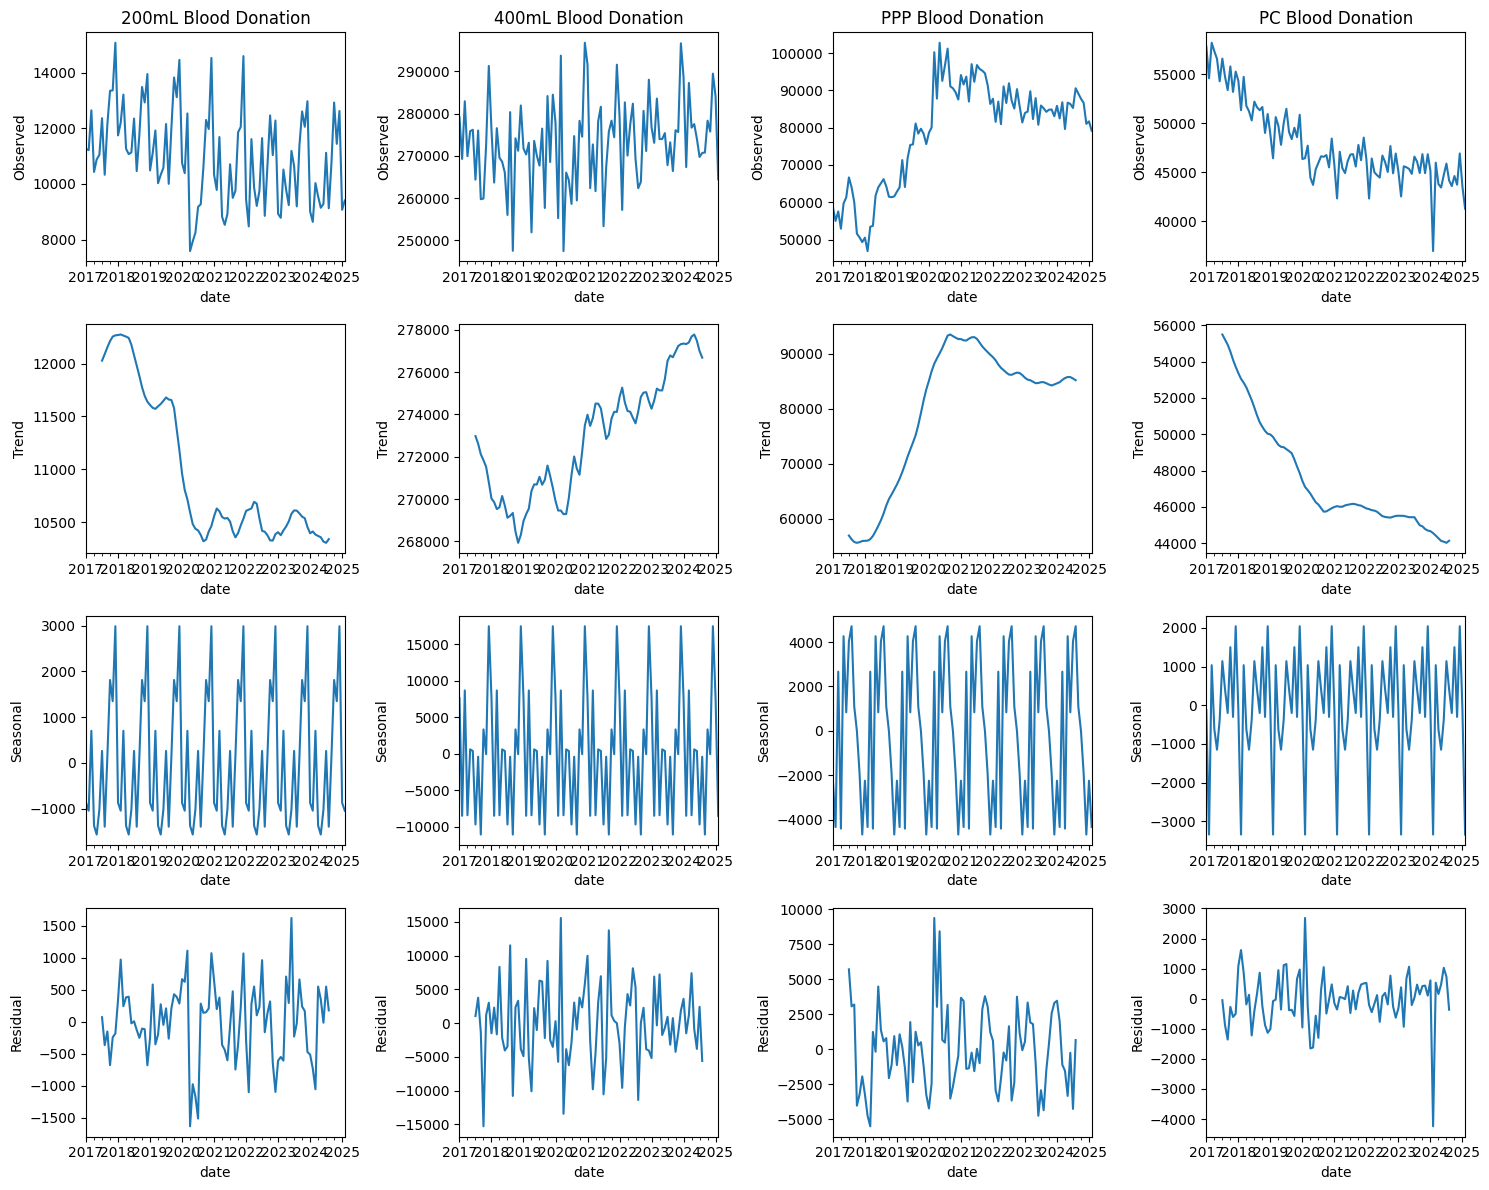

In [7]:
# ÁåÆË°ÄÊñπÊ≥ïÂà•Â§âÂãïÊàêÂàÜ„ÅÆÂàÜËß£

# date„Åî„Å®„Å´„Ç∞„É´„Éº„ÉóÂåñ
df_2bd = df.groupby(['date'])['200mL_blood_donation'].sum().to_frame()
df_4bd = df.groupby(['date'])['400mL_blood_donation'].sum().to_frame()
df_pbd = df.groupby(['date'])['PPP_blood_donation'].sum().to_frame()
df_cbd = df.groupby(['date'])['PC_blood_donation'].sum().to_frame()

# „Éà„É¨„É≥„Éâ„ÄÅÂ≠£ÁØÄÊÄß„ÄÅÊÆãÂ∑Æ„ÇíÊ±Ç„ÇÅ„ÇãÔºàÂä†Ê≥ï„É¢„Éá„É´Ôºâ
res_additive_2bd = sm.tsa.seasonal_decompose(df_2bd, period=12, model="additive")
res_additive_4bd = sm.tsa.seasonal_decompose(df_4bd, period=12, model="additive")
res_additive_pbd = sm.tsa.seasonal_decompose(df_pbd, period=12, model="additive")
res_additive_cbd = sm.tsa.seasonal_decompose(df_cbd, period=12, model="additive")

fig, axs = plt.subplots(4, 4, figsize=(15, 12))

def plot(ax, result, title):
    result.observed.plot(ax=ax[0], legend=False)
    ax[0].set_ylabel('Observed')
    result.trend.plot(ax=ax[1], legend=False)
    ax[1].set_ylabel('Trend')
    result.seasonal.plot(ax=ax[2], legend=False)
    ax[2].set_ylabel('Seasonal')
    result.resid.plot(ax=ax[3], legend=False)
    ax[3].set_ylabel('Residual')
    ax[0].set_title(title)

# ÂêÑ„Ç∞„É©„Éï„ÅÆ„Éó„É≠„ÉÉ„Éà
plot(axs[:, 0], res_additive_2bd, '200mL Blood Donation')
plot(axs[:, 1], res_additive_4bd, '400mL Blood Donation')
plot(axs[:, 2], res_additive_pbd, 'PPP Blood Donation')
plot(axs[:, 3], res_additive_cbd, 'PC Blood Donation')

plt.tight_layout()
plt.show()

200mL„ÄÅPCÔºàË°ÄÂ∞èÊùøÔºâÁåÆË°ÄËÄÖÊï∞„ÅØÊ∏õÂ∞ëÂÇæÂêë„Å´„ÅÇ„Çã

### ÂÆöÂ∏∏ÊÄßÊ§úÂÆö

**ÂÆöÂ∏∏ÊÄßÔºö**<br>
ÊôÇÈñì„Å´„Çà„Çâ„ÅöÁµ±Ë®àÁöÑ„Å™ÁâπÊÄßÔºàÂπ≥Âùá„ÄÅÂàÜÊï£„ÄÅËá™Â∑±Áõ∏Èñ¢„Å™„Å©Ôºâ„Åå‰∏ÄÂÆö„Åß„ÅÇ„Çã„Çà„ÅÜ„Å™ÊôÇÁ≥ªÂàó„Éá„Éº„Çø„ÅÆÊÄßË≥™„ÄÇÂÆöÂ∏∏ÊÄß„ÅåÊ∫Ä„Åü„Åï„Çå„Å¶„ÅÑ„Çã„Å®„ÄÅÈÅéÂéª„ÅÆ„Éá„Éº„Çø„Åã„ÇâÊú™Êù•„ÅÆ„Éá„Éº„Çø„Çí‰∫àÊ∏¨„Åô„Çã‰ø°È†ºÊÄß„Åå„Çà„ÇäÈ´ò„Åè„Å™„Çã„Åü„ÇÅ„ÄÅÊôÇÁ≥ªÂàó„Éá„Éº„Çø„ÅÆËß£Êûê„ÇÑ„É¢„Éá„É™„É≥„Ç∞„ÅåÂÆπÊòì„Å´„Å™„Çã„ÄÇ<br>

**Â∑ÆÂàÜÂ§âÊèõÔºö**<br>
ÈùûÂÆöÂ∏∏ÊÄß„ÇíÈô§Âéª„Åô„ÇãÂÆöÂ∏∏ÂåñÊâãÊ≥ï„ÅÆ‰∏Ä„Å§„Åß„ÄÅ1ÊúüÂâç„ÅÆ„Éá„Éº„Çø„Å®„ÅÆÂ∑ÆÂàÜ„ÇíË®àÁÆó„ÅóÈöéÂ∑ÆÁ≥ªÂàó„ÇíÂæó„Çã„ÄÇ„Åü„Å†„Åó„ÄÅ‰∏ÄÈöéÂ∑ÆÂàÜ„ÇíË®àÁÆó„Åô„Çã„Å®„ÄÅÊúÄÂàù„ÅÆË°å„ÅåÊ¨†ÊêçÂÄ§„Å´„Å™„Çã„Åü„ÇÅ„Åù„Çå„ÇíÂâäÈô§„Åô„Çã„Åü„ÇÅ„Å´`.dropna()`„ÇíÁî®„ÅÑ„Çã„ÄÇ

**ADFÊ§úÂÆöÔºö**<br>
ÂÆöÂ∏∏ÊÄßÊ§úÂÆö„ÅÆ‰ª£Ë°®ÁöÑ„Å™ÊâãÊ≥ï„ÅÆ‰∏Ä„Å§„Åß„ÄÅÂçò‰ΩçÊ†π„ÅÆÊúâÁÑ°„ÇíÊ§úÂÆö„Åô„Çã„ÄÇ<br><br>
„ÉºADFÊ§úÂÆö„ÅÆÊµÅ„Çå„Éº<br>
1. Â∏∞ÁÑ°‰ªÆË™¨„ÇíÂØæÁ´ã‰ªÆË™¨„ÇíÁ´ã„Å¶„Çã<br>
   - Â∏∞ÁÑ°‰ªÆË™¨$H_0$ÔºöÊôÇÁ≥ªÂàó„ÅØÂÆöÂ∏∏„Åß„ÅÇ„ÇãÔºàÂçò‰ΩçÊ†π„ÇíÊåÅ„Å§Ôºâ
   - ÂØæÁ´ã‰ªÆË™¨$H_1$ÔºöÊôÇÁ≥ªÂàó„ÅØÂÆöÂ∏∏„Åß„ÅØ„Å™„ÅÑÔºàÂçò‰ΩçÊ†π„ÇíÊåÅ„Åü„Å™„ÅÑ
2. Ê§úÂÆöÈáè„ÅÆÊØîËºÉ<br>
   ‰∏ÄËà¨ÁöÑ„Å´pÂÄ§„ÅÆÈñæÂÄ§(ÊúâÊÑèÊ∞¥Ê∫ñ)„Å®„Åó„Å¶0.05„ÅåÁî®„ÅÑ„Çâ„Çå„Çã„ÄÇpÂÄ§„Åå0.05„Çà„ÇäÂ∞è„Åï„ÅÑ„Å®„Åç**5%ÊúâÊÑè**„Å®„ÅÑ„ÅÑ„ÄÅÂ∏∞ÁÑ°‰ªÆË™¨„ÇíÊ£ÑÂç¥„ÅóÂØæÁ´ã‰ªÆË™¨„ÇíÊé°Êäû„Åô„Çã„ÄÇ„Åæ„Åü„ÄÅADFÁµ±Ë®àÈáè„Åå5%„ÅÆ**Ê£ÑÂç¥ÈôêÁïåÂÄ§**„Çà„ÇäÂ∞è„Åï„ÅÑ„Å®„Åç**5%ÊúâÊÑè**„Å®„ÅÑ„ÅÑ„ÄÅÂ∏∞ÁÑ°‰ªÆË™¨„ÇíÊ£ÑÂç¥„ÅóÂØæÁ´ã‰ªÆË™¨„ÇíÊé°Êäû„Åô„Çã„ÄÇ<br>
   „Åô„Å™„Çè„Å°„ÄÅpÂÄ§„Å®ADFÁµ±Ë®àÈáè„ÅÆ‰∏°Êñπ„Åå5%„ÅÆÊúâÊÑèÊ∞¥Ê∫ñ„Çí‰∏ãÂõû„ÇãÂ†¥Âêà„ÄÅÊôÇÁ≥ªÂàó„ÅØÂÆöÂ∏∏„Åß„ÅÇ„ÇãÂèØËÉΩÊÄß„ÅåÈ´ò„ÅÑ„Åì„Å®„ÇíÁ§∫ÂîÜ„Åô„Çã„ÄÇ

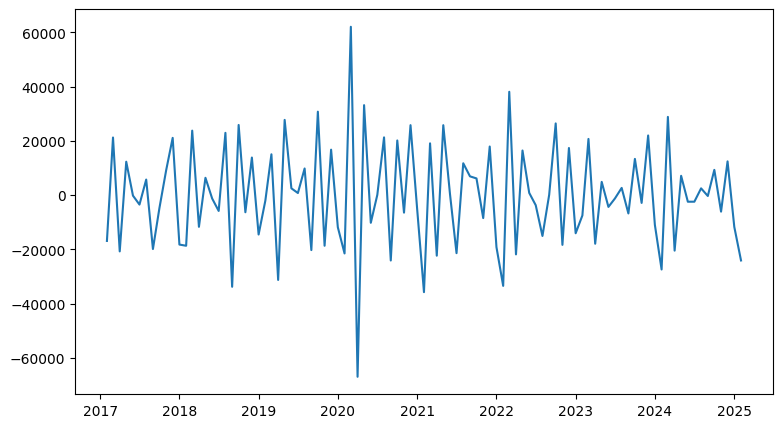

--- diff ---
ADF Statistic: -3.102680
p-value: 0.026355
Critical values :
	 1% -3.510711795769895
	 5% -2.8966159448223734
	 10% -2.5854823866213152


In [8]:
# Â∑ÆÂàÜÂ§âÊèõ
df_diff = grouped_date_total.diff(1).dropna()
plt.plot(df_diff)
plt.show()

# ADFÊ§úÂÆö
dftest = adfuller(df_diff)
print("--- diff ---")
print('ADF Statistic: %f' % dftest[0])
print('p-value: %f' % dftest[1])
print('Critical values :')
for k, v in dftest[4].items():
    print('\t', k, v)

- ADFÁµ±Ë®àÈáè„ÅØ-4.775412„Åß„ÅÇ„Çä5%„ÅÆÊ£ÑÂç¥ÈôêÁïåÂÄ§„Çí‰∏ãÂõû„Å£„Å¶„ÅÑ„Çã„ÅÆ„Åß5%ÊúâÊÑè<br>
- pÂÄ§„ÅØ0.000061„Åß„ÅÇ„Çä5%„ÅÆÊ£ÑÂç¥ÈôêÁïåÂÄ§„Çí‰∏ãÂõû„Å£„Å¶„ÅÑ„Çã„ÅÆ„Åß5%ÊúâÊÑè<br>
„Çà„Å£„Å¶„ÄÅÂ∏∞ÁÑ°‰ªÆË™¨ÔºàÊôÇÁ≥ªÂàó„ÅØÈùûÂÆöÂ∏∏„Åß„ÅÇ„ÇãÔºâ„ÅØÊ£ÑÂç¥„Åï„Çå„ÄÅÂØæÁ´ã‰ªÆË™¨ÔºàÊôÇÁ≥ªÂàó„ÅØÂÆöÂ∏∏„Åß„ÅÇ„ÇãÔºâ„ÅåÊé°Êäû„Åï„Çå„Åü„ÄÇ<br>
„Åô„Å™„Çè„Å°„ÄÅÂÆöÂ∏∏ÊÄß„ÅåË™ç„ÇÅ„Çâ„Çå„Åü„ÄÇüëè

### Áõ∏Èñ¢ÂàÜÊûê
2„Å§‰ª•‰∏ä„ÅÆÂ§âÊï∞Èñì„ÅÆÈñ¢‰øÇÊÄß„ÇíÂÆöÈáèÁöÑ„Å´Ë©ï‰æ°„Åô„Çã„Åü„ÇÅ„ÅÆÁµ±Ë®àÊâãÊ≥ï„Åß„ÄÅÂ§âÊï∞Èñì„ÅÆÈñ¢ÈÄ£ÊÄß„ÅÆÂº∑„Åï„Å®ÊñπÂêëÊÄß„ÇíÁêÜËß£„Åô„Çã„Åì„Å®„Åå„Åß„Åç„Çã„ÄÇ<br>
**Ëá™Â∑±Áõ∏Èñ¢ÔºàACFÔºâÔºö**<br>
„Åï„Åæ„Åñ„Åæ„Å™„É©„Ç∞ÔºàÈÅÖ„ÇåÔºâ„Åß„ÅÆËá™Â∑±Áõ∏Èñ¢„ÇíÁ§∫„ÅôÈñ¢Êï∞„ÄÇACF„Éó„É≠„ÉÉ„Éà„Çí‰ΩøÁî®„Åô„Çã„Åì„Å®„Åß„ÄÅÊôÇÁ≥ªÂàó„Éá„Éº„ÇøÂÜÖ„ÅÆË¶≥Ê∏¨ÂÄ§„ÅåÈÅéÂéª„ÅÆËá™Ë∫´„Å®„Å©„ÅÆÁ®ãÂ∫¶Èñ¢ÈÄ£„Åó„Å¶„ÅÑ„Çã„Åã„ÇíË¶ñË¶öÁöÑ„Å´Ë©ï‰æ°„Åô„Çã„Åì„Å®„Åå„Åß„Åç„Çã„ÄÇ<br>
**ÂÅèËá™Â∑±Áõ∏Èñ¢ÔºàPACFÔºâÔºö**<br>
‰∏≠Èñì„ÅÆ„É©„Ç∞„ÅÆÂΩ±Èüø„ÇíÈô§„ÅÑ„ÅüÁâπÂÆö„ÅÆ„É©„Ç∞„Åß„ÅÆÂÅèËá™Â∑±Áõ∏Èñ¢„ÇíÁ§∫„ÅôÈñ¢Êï∞„ÄÇÂÅèËá™Â∑±Áõ∏Èñ¢Èñ¢Êï∞„ÇíÁî®„ÅÑ„Çã„Åì„Å®„Åß„ÄÅÁõ¥Êé•ÁöÑ„Å™„É©„Ç∞„ÅÆÂΩ±Èüø„ÇíË©ï‰æ°„Åô„Çã„Åì„Å®„Åå„Åß„Åç„Çã„ÄÇ

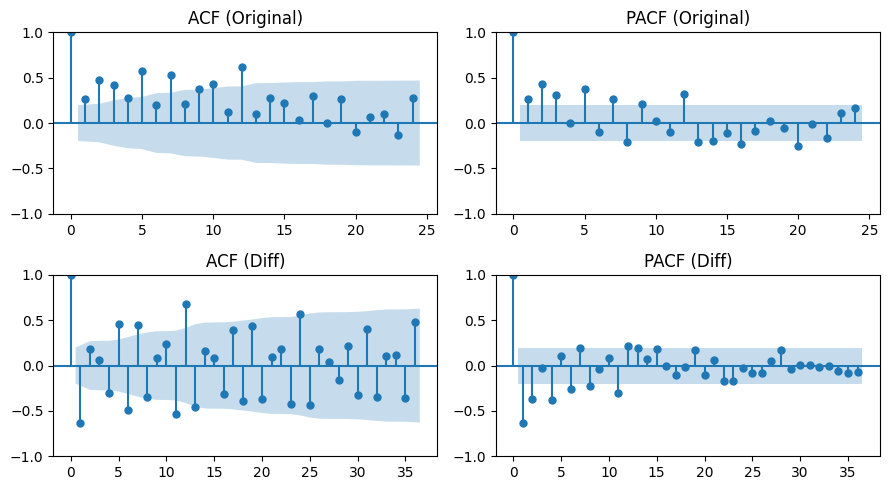

In [9]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# „Çµ„Éñ„Éó„É≠„ÉÉ„Éà„ÅÆ‰ΩúÊàê
fig, axes = plt.subplots(2, 2)

# ACF„Å®PACF„Çí„Éó„É≠„ÉÉ„Éà
plot_acf(grouped_date_total, lags=24, ax=axes[0, 0])
plot_pacf(grouped_date_total, lags=24, ax=axes[0, 1])

# Â∑ÆÂàÜÂ§âÊèõ„Åó„Åü„Éá„Éº„Çø„ÅÆACF„Å®PACF„Çí„Éó„É≠„ÉÉ„Éà
df_diff = grouped_date_total.diff(1).dropna()
plot_acf(df_diff, lags=36, ax=axes[1, 0])
plot_pacf(df_diff, lags=36, ax=axes[1, 1])

# „Ç∞„É©„Éï„ÅÆ„Çø„Ç§„Éà„É´„ÇíË®≠ÂÆö
axes[0, 0].set_title('ACF (Original)')
axes[0, 1].set_title('PACF (Original)')
axes[1, 0].set_title('ACF (Diff)')
axes[1, 1].set_title('PACF (Diff)')

# „Ç∞„É©„Éï„ÇíË°®Á§∫
plt.tight_layout()
plt.show()

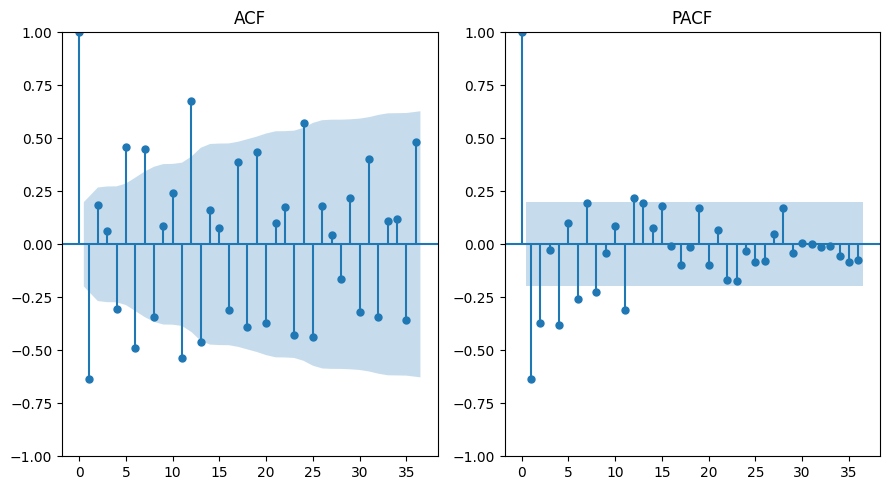

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# „Çµ„Éñ„Éó„É≠„ÉÉ„Éà„ÅÆ‰ΩúÊàê
fig, axes = plt.subplots(1, 2)

# Â∑ÆÂàÜÂ§âÊèõ„Åó„Åü„Éá„Éº„Çø„ÅÆACF„Å®PACF„Çí„Éó„É≠„ÉÉ„Éà
plot_acf(df_diff, lags=36, ax=axes[0])
plot_pacf(df_diff, lags=36, ax=axes[1])

# „Ç∞„É©„Éï„ÅÆ„Çø„Ç§„Éà„É´„ÇíË®≠ÂÆö
axes[0].set_title('ACF')
axes[1].set_title('PACF')

# „Ç∞„É©„Éï„ÇíË°®Á§∫
plt.tight_layout()
plt.show()


### ÂèÇËÄÉ„Å´„Åó„Åü„Çµ„Ç§„ÉàÁ≠â
https://www.kaggle.com/code/anguillajaponica/time-series-basics